In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ncarral/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ncarral/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('spanish'))
palabras_ins = ['eh', 'la', 'los', 'y', 'es', 'el', 'de', 'no', 'hay', 'porque']

In [4]:
df = pd.read_csv('base_2.csv',quotechar='"')
lista_textos = df['TEXTO'].tolist()

textos_limp = []

for texto in lista_textos:
    palabras = word_tokenize(texto)
    palabras_limp = [palabra for palabra in palabras if palabra.lower() not in stop_words and palabra not in palabras_ins]
    texto_limpio = ' '.join(palabras_limp)
    textos_limp.append(texto_limpio)

In [5]:
df_limpio = pd.DataFrame({'TEXTO_LIMPIO': textos_limp})

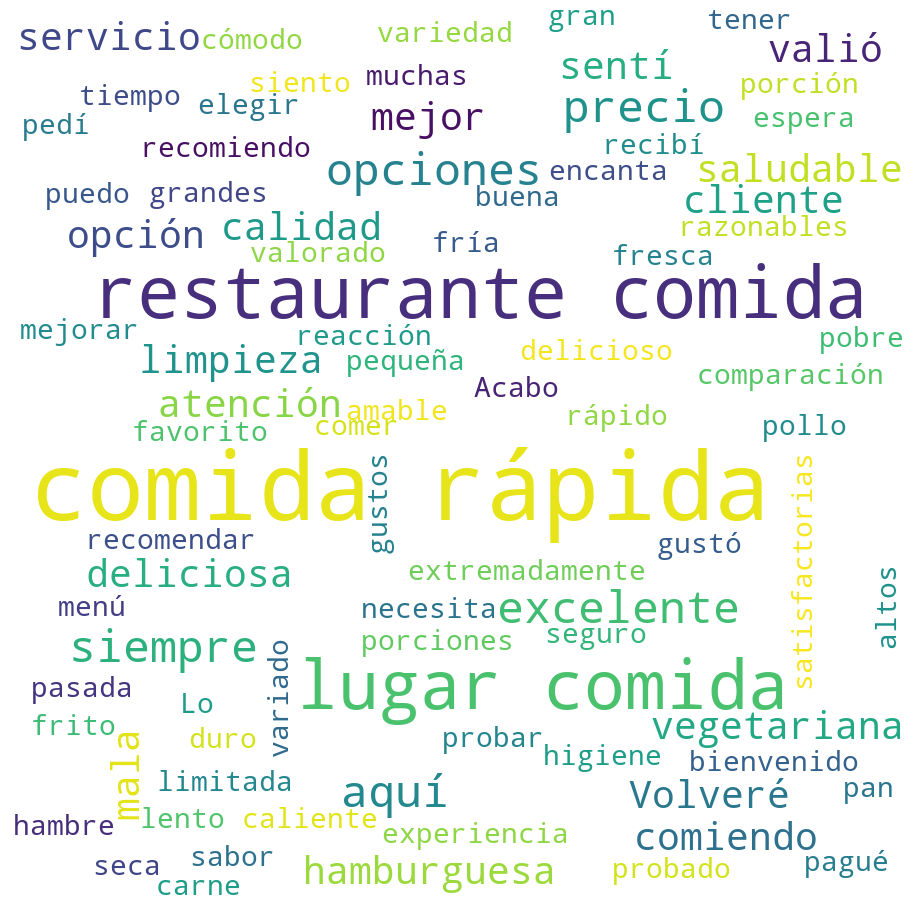

In [6]:
texto = ' '.join(df_limpio['TEXTO_LIMPIO'].tolist())

wordcloud = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                min_font_size = 10).generate(texto)

plt.figure(figsize = (9, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()